# 리뷰 유형별 분석

## 분석 목표
- 리뷰 유형(점수만, 제목만, 컨텐츠만, 둘 다)별로 평균 점수 및 부정 리뷰 비율 분석
- 고객이 어떤 경우에 리뷰를 작성하는지 패턴 파악


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 리뷰 데이터 로드
reviews_df = pd.read_csv('Olist_DataSet/olist_order_reviews_dataset.csv')

print(f"리뷰 데이터 크기: {reviews_df.shape}")
print(f"\n컬럼 목록:")
print(reviews_df.columns.tolist())


리뷰 데이터 크기: (99224, 7)

컬럼 목록:
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


## 1. 리뷰 샘플 데이터 확인


In [5]:
# 리뷰 데이터 샘플 확인
print("=" * 80)
print("리뷰 데이터 샘플 (처음 10개)")
print("=" * 80)
reviews_df.head(10).T


리뷰 데이터 샘플 (처음 10개)


,0,1,2,3,4,5,6,7,8,9
review_id,7bc2406110b926393aa56f80a40eba40,80e641a11e56f04c1ad469d5645fdfde,228ce5500dc1d8e020d8d1322874b6f0,e64fb393e7b32834bb789ff8bb30750e,f7c4243c7fe1938f181bec41a392bdeb,15197aa66ff4d0650b5434f1b46cda19,07f9bee5d1b850860defd761afa7ff16,7c6400515c67679fbee952a7525281ef,a3f6f7f6f433de0aefbb97da197c554c,8670d52e15e00043ae7de4c01cc2fe06
order_id,73fc7af87114b39712e6da79b0a377eb,a548910a1c6147796b98fdf73dbeba33,f9e4b658b201a9f2ecdecbb34bed034b,658677c97b385a9be170737859d3511b,8e6bfb81e283fa7e4f11123a3fb894f1,b18dcdf73be66366873cd26c5724d1dc,e48aa0d2dcec3a2e87348811bcfdf22b,c31a859e34e3adac22f376954e19b39d,9c214ac970e84273583ab523dfafd09b,b9bf720beb4ab3728760088589c62129
review_score,4,5,5,5,5,1,5,5,5,4
review_comment_title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,recomendo
review_comment_message,NaN,NaN,NaN,Recebi bem antes do prazo estipulado.,Parabéns lojas lannister adorei comprar pela I...,NaN,NaN,NaN,NaN,aparelho eficiente. no site a marca do aparelh...
review_creation_date,2018-01-18 00:00:00,2018-03-10 00:00:00,2018-02-17 00:00:00,2017-04-21 00:00:00,2018-03-01 00:00:00,2018-04-13 00:00:00,2017-07-16 00:00:00,2018-08-14 00:00:00,2017-05-17 00:00:00,2018-05-22 00:00:00
review_answer_timestamp,2018-01-18 21:46:59,2018-03-11 03:05:13,2018-02-18 14:36:24,2017-04-21 22:02:06,2018-03-02 10:26:53,2018-04-16 00:39:37,2017-07-18 19:30:34,2018-08-14 21:36:06,2017-05-18 12:05:37,2018-05-23 16:45:47


In [6]:
# 리뷰 데이터 기본 정보
print("=" * 80)
print("리뷰 데이터 기본 정보")
print("=" * 80)
print(reviews_df.info())

print("\n" + "=" * 80)
print("결측치 확인")
print("=" * 80)
print(reviews_df.isnull().sum())


리뷰 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

결측치 확인
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [7]:
# 리뷰 제목과 컨텐츠 샘플 상세 확인
print("=" * 80)
print("리뷰 제목 (review_comment_title) 샘플")
print("=" * 80)

# 제목이 있는 리뷰만 샘플
title_samples = reviews_df[reviews_df['review_comment_title'].notna()][['review_score', 'review_comment_title']].head(10)
for idx, row in title_samples.iterrows():
    print(f"[점수: {row['review_score']}] {row['review_comment_title']}")
    
print("\n" + "=" * 80)
print("리뷰 컨텐츠 (review_comment_message) 샘플")
print("=" * 80)

# 컨텐츠가 있는 리뷰만 샘플
content_samples = reviews_df[reviews_df['review_comment_message'].notna()][['review_score', 'review_comment_message']].head(5)
for idx, row in content_samples.iterrows():
    print(f"\n[점수: {row['review_score']}]")
    print(f"{row['review_comment_message'][:200]}..." if len(str(row['review_comment_message'])) > 200 else row['review_comment_message'])


리뷰 제목 (review_comment_title) 샘플
[점수: 4] recomendo
[점수: 5] Super recomendo
[점수: 1] Não chegou meu produto 
[점수: 5] Ótimo
[점수: 4] Muito bom.
[점수: 5] Bom
[점수: 5] Maravilhoso!
[점수: 5] Entrega perfeita
[점수: 5] Ótimo
[점수: 5] MT lindo

리뷰 컨텐츠 (review_comment_message) 샘플

[점수: 5]
Recebi bem antes do prazo estipulado.

[점수: 5]
Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa

[점수: 4]
aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho

[점수: 4]
Mas um pouco ,travando...pelo valor ta Boa.


[점수: 5]
Vendedor confiável, produto ok e entrega antes do prazo.


## 2. 리뷰 유형 분류

리뷰를 다음 4가지 유형으로 분류:
1. **점수만**: 제목과 컨텐츠 모두 없음
2. **제목만**: 제목만 있고 컨텐츠 없음
3. **컨텐츠만**: 컨텐츠만 있고 제목 없음
4. **둘 다**: 제목과 컨텐츠 모두 있음


In [8]:
# 리뷰 유형 분류
# 제목/컨텐츠 존재 여부 확인
reviews_df['has_title'] = reviews_df['review_comment_title'].notna()
reviews_df['has_content'] = reviews_df['review_comment_message'].notna()

# 리뷰 유형 분류
def classify_review_type(row):
    has_title = row['has_title']
    has_content = row['has_content']
    
    if not has_title and not has_content:
        return '점수만'
    elif has_title and not has_content:
        return '제목만'
    elif not has_title and has_content:
        return '컨텐츠만'
    else:
        return '둘 다'

reviews_df['review_type'] = reviews_df.apply(classify_review_type, axis=1)

# 리뷰 유형별 분포 확인
print("=" * 80)
print("리뷰 유형별 분포")
print("=" * 80)

review_type_counts = reviews_df['review_type'].value_counts()
review_type_pct = (review_type_counts / len(reviews_df) * 100).round(1)

for review_type in ['점수만', '제목만', '컨텐츠만', '둘 다']:
    count = review_type_counts.get(review_type, 0)
    pct = review_type_pct.get(review_type, 0)
    print(f"  {review_type}: {count:,}건 ({pct}%)")


리뷰 유형별 분포
  점수만: 56,518건 (57.0%)
  제목만: 1,729건 (1.7%)
  컨텐츠만: 31,138건 (31.4%)
  둘 다: 9,839건 (9.9%)


## 3. 리뷰 유형별 평균 점수 및 부정 리뷰 비율 분석


In [9]:
# 리뷰 유형별 평균 점수 및 부정 리뷰 비율 분석
print("=" * 80)
print("리뷰 유형별 평균 점수 및 부정 리뷰 비율")
print("=" * 80)

results = []

result_df = reviews_df.groupby('review_type')['review_score'].agg(
    건수 = 'count',
    평균_점수 = 'mean',
    중앙값 = 'median',
    부정_리뷰_비율 = lambda x: (x <= 2).mean() * 100, 
    긍정_리뷰_비율 = lambda x: (x >= 4).mean() * 100
)
result_df = result_df.round(2)

print(result_df)


리뷰 유형별 평균 점수 및 부정 리뷰 비율
                건수  평균_점수  중앙값  부정_리뷰_비율  긍정_리뷰_비율
review_type                                       
둘 다           9839   3.84  5.0     22.84     69.67
점수만          56518   4.38  5.0      6.34     85.64
제목만           1729   4.50  5.0      6.02     88.95
컨텐츠만         31138   3.62  4.0     27.76     63.19


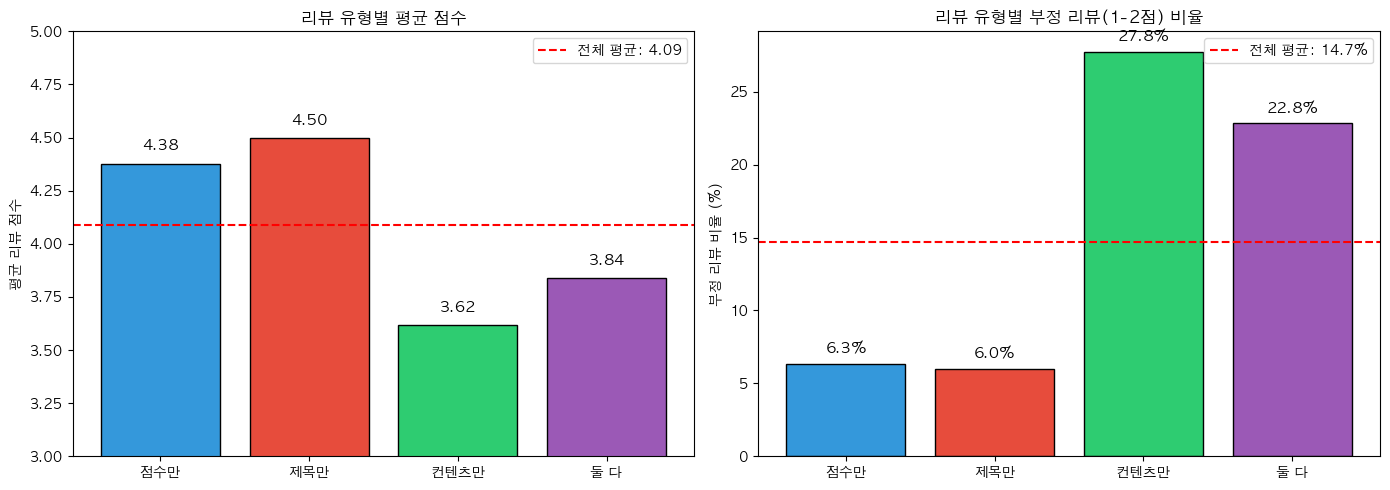

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

review_types = ['점수만', '제목만', '컨텐츠만', '둘 다']

# 1. 리뷰 유형별 평균 점수
ax = axes[0]
avg_scores = [reviews_df[reviews_df['review_type'] == rt]['review_score'].mean() for rt in review_types]
bars = ax.bar(review_types, avg_scores, color=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'], edgecolor='black')
ax.axhline(y=reviews_df['review_score'].mean(), color='red', linestyle='--', label=f'전체 평균: {reviews_df["review_score"].mean():.2f}')
ax.set_ylabel('평균 리뷰 점수')
ax.set_title('리뷰 유형별 평균 점수')
ax.set_ylim(3.0, 5.0)
ax.legend()

# 막대 위에 값 표시
for bar, score in zip(bars, avg_scores):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{score:.2f}', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. 리뷰 유형별 부정 리뷰 비율
ax = axes[1]
neg_ratios = [(reviews_df[reviews_df['review_type'] == rt]['review_score'] <= 2).mean() * 100 for rt in review_types]
bars = ax.bar(review_types, neg_ratios, color=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6'], edgecolor='black')
ax.axhline(y=(reviews_df['review_score'] <= 2).mean() * 100, color='red', linestyle='--', 
           label=f'전체 평균: {(reviews_df["review_score"] <= 2).mean() * 100:.1f}%')
ax.set_ylabel('부정 리뷰 비율 (%)')
ax.set_title('리뷰 유형별 부정 리뷰(1-2점) 비율')
ax.legend()

# 막대 위에 값 표시ㅠ
for bar, ratio in zip(bars, neg_ratios):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{ratio:.1f}%', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


## 4. 배송 지연 극단값 분석 (150일 이상 지연 + 5점 리뷰)

배송이 150일 이상 지연되었는데도 5점 리뷰를 남긴 이상 케이스를 분석


In [ ]:
orders_df = pd.read_csv('Olist_DataSet/olist_orders_dataset.csv')
items_df = pd.read_csv('Olist_DataSet/olist_order_items_dataset.csv')
products_df = pd.read_csv('Olist_DataSet/olist_products_dataset.csv')
category_trans_df = pd.read_csv('Olist_DataSet/product_category_name_translation.csv')
customers_df = pd.read_csv('Olist_DataSet/olist_customers_dataset.csv')
sellers_df = pd.read_csv('Olist_DataSet/olist_sellers_dataset.csv')

# 날짜 컬럼 변환
date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
             'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

# 배송 완료된 주문만 필터링
delivered_orders = orders_df[orders_df['order_status'] == 'delivered'].copy()

# 배송 지연일 계산
delivered_orders['delivery_delay'] = (
    delivered_orders['order_delivered_customer_date'] - delivered_orders['order_estimated_delivery_date']
).dt.days

# 리뷰 데이터와 결합
merged_df = delivered_orders.merge(reviews_df[['order_id', 'review_score', 'review_comment_title', 'review_comment_message']], 
                                    on='order_id', how='left')


배송 완료 주문 수: 96,478
리뷰가 있는 주문 수: 96,361


In [38]:
# 100일 이상 지연 주문 전체에서 리뷰 점수 분포 비교
print("=" * 80)
print("100일 이상 배송 지연 케이스 전체 리뷰 점수 분포")
print("=" * 80)

# 100일 이상 지연 케이스 전체
extreme_delay_all = merged_df[merged_df['delivery_delay'] >= 50].copy()

print(f"\n100일 이상 배송 지연 전체 건수: {len(extreme_delay_all)}건")

# 리뷰 점수 분포
score_dist = extreme_delay_all['review_score'].value_counts().sort_index()
print(f"\n[리뷰 점수 분포]")
for score, count in score_dist.items():
    pct = count / len(extreme_delay_all) * 100
    print(f"  {int(score)}점: {count:>3}건 ({pct:>5.1f}%)")

# 평균 점수
print(f"\n평균 리뷰 점수: {extreme_delay_all['review_score'].mean():.2f}")
print(f"5점 비율: {(extreme_delay_all['review_score'] == 5).mean() * 100:.1f}%")
print(f"1-2점(부정) 비율: {(extreme_delay_all['review_score'] <= 2).mean() * 100:.1f}%")


100일 이상 배송 지연 케이스 전체 리뷰 점수 분포

100일 이상 배송 지연 전체 건수: 121건

[리뷰 점수 분포]
  1점:  52건 ( 43.0%)
  2점:   4건 (  3.3%)
  3점:   9건 (  7.4%)
  4점:  24건 ( 19.8%)
  5점:  26건 ( 21.5%)

평균 리뷰 점수: 2.72
5점 비율: 21.5%
1-2점(부정) 비율: 46.3%
